<a href="https://colab.research.google.com/github/23f1002944/EDA-Probability-Distributions/blob/main/Markov_and_Chebyshev.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pratsharma7/student-quiz-marks-dataset")

print("Path to dataset files:", path)

100%|██████████| 12.5k/12.5k [00:00<00:00, 12.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/pratsharma7/student-quiz-marks-dataset/versions/2


In [3]:
import pandas as pd
marks=pd.read_csv(path+"/marks_final.csv")
marks.head()

,SNO.,ROLL NUMBER,Q1 (5),Q2 (5),Q3 (5),Q4 (5),Q5 (5),Q6 (5),Q7 (5),Q8 (5),Q9 (5),Q10 (5),Q11 (5),Q12 (5),Top 9 (out of 45),Out of 30
0,1,102003733,AB,AB,AB,AB,AB,AB,3,5,AB,AB,AB,4,12,8.0
1,2,102203002,5,AB,4,4,4,4,4,3,5,5,5,3,40,26.7
2,3,102203003,5,4,4,4,4,5,4,3,4,5,4,2,39,26.0
3,4,102203005,AB,AB,AB,AB,3,5,3,4,4,5,5,AB,29,19.3
4,5,102203007,AB,AB,AB,5,4,3,3,5,3,5,5,3,36,24.0


In [5]:
marks.describe()

,SNO.,ROLL NUMBER,Top 9 (out of 45),Out of 30
count,1053.00000,1.053000e+03,1053.000000,1053.000000
mean,527.00000,1.027862e+08,38.144349,25.430104
std,304.11922,1.848957e+07,7.150877,4.766492
min,1.00000,1.020037e+08,0.000000,0.000000
25%,264.00000,1.022033e+08,37.000000,24.700000
50%,527.00000,1.022035e+08,40.000000,26.700000
75%,790.00000,1.022038e+08,42.000000,28.000000
max,1053.00000,7.022000e+08,45.000000,30.000000


Markov Inequality:-

For a non negative Rancom Variable, the probability of getting a value more than a multiple 'c' of mean is less than equal to 1/c

Means we can upper bound the right tail (values greater than a certain value) of the distribution

In [11]:
marks["Out of 100"]=(marks["Out of 30"]/30)*100
mean=marks["Out of 100"].mean()
print("Mean of marks:",mean)

Mean of marks: 84.76701487812598


In this students marks data, we first normalize marks out of 30 to out of 100, then calculated the mean

Now if by chance we jsut have the mean of the distribution, and no other knowledge of it other than X is non negative

And if we want to estimate, what is the probability that a student scores marks >= 90, then we can get that, means we can get the percentage of students, that get marks more than 90, without any knowledge of distribution

In [12]:
c=90/mean
print(c)

1.0617337431239942


In [13]:
print("Probability of getting more than 90 marks is, P(X>=(1.06 * 84.77))<=(mean/c) = <", +mean/c)

Probability of getting more than 90 marks is, P(X>=(1.06 * 84.77))<=(mean/c) = < 79.83829790387145


We estimated that less than 79% of students will score more than 90 marks, that's top 20 percentile

Now let's verify this through our Empirical Distribution

In [16]:
# Calculate the number of students who scored 90 or above
students_above_90 = marks[marks['Out of 100'] >= 90].shape[0]

# Calculate the total number of students
total_students = marks.shape[0]

# Calculate the empirical probability
empirical_probability = (students_above_90 / total_students) * 100

print(f"The empirical probability of a student scoring 90 or above is: {empirical_probability:.2f}%")

The empirical probability of a student scoring 90 or above is: 45.20%


**Comparison of Markov Inequality and Empirical Probability**

We used Markov's Inequality to estimate the upper bound for the probability of a student scoring 90 or above. The inequality states:

$P(X \ge c) \le \frac{E[X]}{c}$

Where:
- $X$ is the random variable representing the student's marks.
- $E[X]$ is the mean of the marks (which we calculated as approximately 84.77).
- $c$ is the value we are interested in (90).

Using the inequality, we estimated that the probability of a student scoring 90 or above is less than or equal to approximately 79.84%.

We then calculated the empirical probability directly from the dataset by finding the percentage of students who actually scored 90 or above. This resulted in an empirical probability of approximately 45.20%.

As expected, the empirical probability (45.20%) is less than the upper bound estimated by Markov's Inequality (79.84%). This demonstrates how Markov's inequality provides a loose upper bound when we only have knowledge of the mean of a non-negative distribution, without knowing the specific distribution shape.

Difference is quite significant because Markov is still not the most accurate bound, a better bound will be an exponential bound

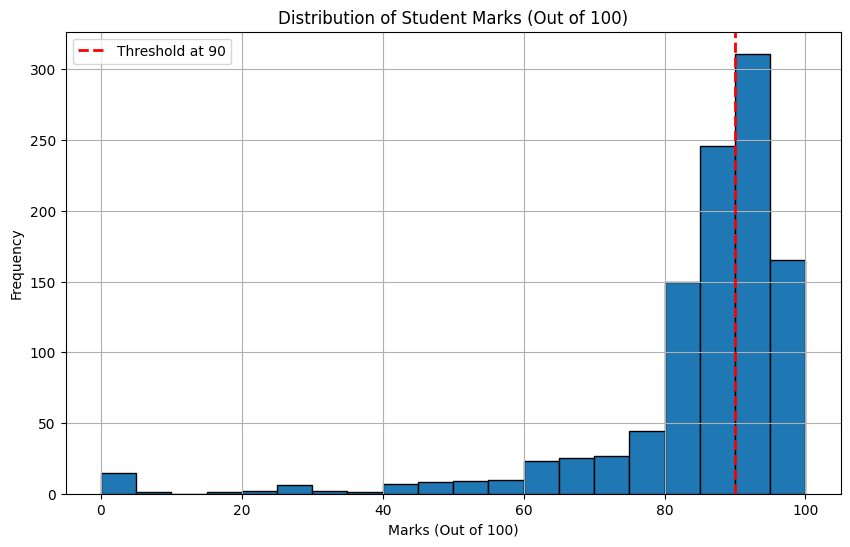

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(marks['Out of 100'], bins=20, edgecolor='black')
plt.axvline(x=90, color='red', linestyle='dashed', linewidth=2, label='Threshold at 90') # Add vertical line at 90
plt.xlabel('Marks (Out of 100)')
plt.ylabel('Frequency')
plt.title('Distribution of Student Marks (Out of 100)')
plt.legend() # Add legend to show the label for the vertical line
plt.grid(True)
plt.show()

From this graph the values in the right side of the red line are in our interest as per the markov's formula

But still we can appreciate the fact that we can use Markov's Inequality to estimate the percentage of having more than a certain value above mean, which can be used in various real world scenarios (max capacities, edge cases, max tolerable failure rates, etc)